In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import os 
import random
import sys
import time
from time import localtime, strftime
  
import numpy as np
import tensorflow as tf
  
# import cv2
  
import matplotlib
import matplotlib.pyplot as plt
 
from matplotlib import font_manager, rc
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.utils import np_utils
from keras.utils import to_categorical
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
 
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img, img_to_array, load_img
  
from sklearn.preprocessing import LabelEncoder  # class가 문자열인경우 변환
from sklearn.model_selection import train_test_split # 학습셋과 테스트셋을 나눔
from sklearn.model_selection import StratifiedKFold  # K겹 교차 검증
 
 
 
# 기본 제공 데이터 
from keras.datasets import mnist
from keras.datasets import cifar10
 
# -----------------------------------------------------------------------------------------
# CNN 테스트시 failed to create cublas handle: CUBLAS_STATUS_ALLOC_FAILED 에러 발생시 추가
config = tf.ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction = 1.0 # 메모리를 사전에 모두 할당
config.gpu_options.allow_growth = True                     # 메모리를 필요시 할당
session = tf.Session(config=config)
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True)) # 연결된 device 확인
# -----------------------------------------------------------------------------------------
 
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
# windows 10
# font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgunsl.ttf").get_name()
rc('font', family=font_name)           # 맑은 고딕 폰트 지정
plt.rcParams["font.size"] = 12         # 글자 크기
# plt.rcParams["figure.figsize"] = (10, 4) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정
 
# Jupyter에게 matplotlib 그래프를 출력 영역에 표시할 것을 지시하는 명령
%matplotlib inline  
 
LOG_DIR = '../../logs' # 폴더명만 지정하면 자동으로 생성됨.
 
# tensorboard --logdir=C:/ai_201904/ws_python/notebook/logs 
# graph = tf.get_default_graph()
# with tf.summary.FileWriter(LOG_DIR) as writer:
#     writer.add_graph(graph)
 

Using TensorFlow backend.


In [2]:
np.random.randint(0, 16 * 16) # 0 ~ 256-1 사이의 난수 발생, 최대값은 발생안됨.

6

In [3]:
print(np.zeros((16, 16)))  # 16행 16열 0으로 채워진 배열 생성

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [4]:
np.random.random((10, 2)) # 10행 2열 난수 발생

array([[0.86843172, 0.4913251 ],
       [0.59823747, 0.2120272 ],
       [0.40947114, 0.18466049],
       [0.49451649, 0.47615761],
       [0.62687572, 0.2291373 ],
       [0.84291149, 0.18303763],
       [0.32269177, 0.9785127 ],
       [0.26755472, 0.08275096],
       [0.68012119, 0.80674538],
       [0.62902579, 0.91127856]])

In [5]:
for i in range(25):  # 0 ~ 24
    print(i // 5, i % 5) # //: 정수 나누기, 행열의 구성시 주로 사용    

0 0
0 1
0 2
0 3
0 4
1 0
1 1
1 2
1 3
1 4
2 0
2 1
2 2
2 3
2 4
3 0
3 1
3 2
3 3
3 4
4 0
4 1
4 2
4 3
4 4


In [6]:
width = 16
height = 16

def generate_dataset(samples):  # 1500
    ds_x = [] # 이미지를 출력할 3차원 배열 저장
    ds_y = [] # 0 ~ 255 구간의 정수, 1차원 정수 저장
    
    for it in range(samples):  # 1500: 0 ~ 1499, 1500번 처리
        num_pt = np.random.randint(0, width * height)  # 256: 0 ~ 255
        img = generate_image(num_pt)  # 7 이라면
        
        ds_y.append(num_pt)  # 0 ~ 255 구간의 정수, 레이블, class
        ds_x.append(img)     # 이미지를 출력할 2차원 행렬 추가 
    
    # ds_x를 배열로 변경, ds_y를 1500행 1열로 변환
    # 4차원 배열 형태로 리턴, ds_y 1차원배열이된후 2차원 배열로 리턴 1500행 1열
    return np.array(ds_x), np.array(ds_y).reshape(samples, 1)
    
def generate_image(points): # 0 ~ 255, 7이라고 가정
    img = np.zeros((width, height))  # 16 x 16의 0으로 채워진 행렬
    pts = np.random.random((points, 2)) # 7이하면 7행 2열의 난수 발생
    
    # pts는 2차원 배열이나 for문 때문에 하나의 행씩 추출됨. [0.26333527, 0.20043297]
    for ipt in pts: 
        # int(0.26333527 * 16), int(0.20043297 * 16)] = 1
        img[int(ipt[0] * width), int(ipt[1] * height)] = 1
    
    # 2차원 배열을 3차원으로 변형
    return img.reshape(width, height, 1) # 16 x 16의 1: 흑백 이미지 생성
 



In [7]:
# 훈련용, 이미지 출력용 행렬, 1500행 1열 정수 행렬
x_train, y_train = generate_dataset(1500) 
print(x_train.shape)
print(x_train[0].shape)
print(y_train.shape)
x_val, y_val = generate_dataset(300)      # 검증용
print(x_val.shape)
print(y_val.shape)
x_test, y_test = generate_dataset(100)    # 시험용

(1500, 16, 16, 1)
(16, 16, 1)
(1500, 1)
(300, 16, 16, 1)
(300, 1)


0 0
0 1
0 2
0 3
0 4
1 0
1 1
1 2
1 3
1 4
2 0
2 1
2 2
2 3
2 4
3 0
3 1
3 2
3 3
3 4
4 0
4 1
4 2
4 3
4 4


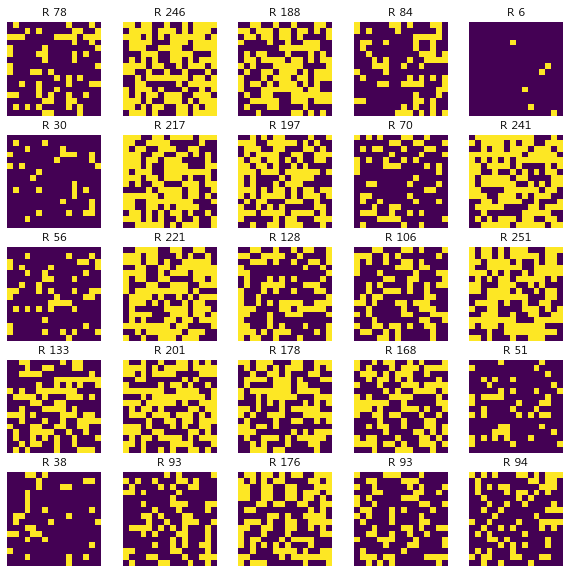

In [8]:
width = 16
height = 16

plt_row = 5 # 행의 수
plt_col = 5 # 열의 수

plt.rcParams["figure.figsize"] = (10,10)  # plot 크기 지정

f, axarr = plt.subplots(plt_row, plt_col)  # 5 x 5 형태의 plot

for i in range(plt_row*plt_col):  # 0 ~ 24
    print((i // plt_row), i % plt_col)
    sub_plt = axarr[i // plt_row][i % plt_col]  # 행열 지정
    sub_plt.axis('off') # 축의 label을 출력하지 않음.
    sub_plt.imshow(x_train[i].reshape(width, height)) # 3차원을 2차원으로 변경
    sub_plt.set_title('R ' + str(y_train[i][0])) # 0 ~ 255 출력

plt.show()

### 다층퍼셉트론 신경망 모델

In [9]:
x_train, y_train = generate_dataset(1500)
x_val, y_val = generate_dataset(300)
x_test, y_test = generate_dataset(100)
print(x_train.shape[0], x_val.shape[0],x_test.shape[0])

x_train_1d = x_train.reshape(x_train.shape[0], width*height)  # 1500, 256
x_val_1d = x_val.reshape(x_val.shape[0], width*height)        # 300, 256
x_test_1d = x_test.reshape(x_test.shape[0], width*height)     # 100, 256 

1500 300 100


In [10]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim = 256)) # width * height
model.add(Dense(256, activation='relu'))
model.add(Dense(256))
model.add(Dense(1))  # 예측 실수 출력
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train_1d, y_train, batch_size=32, epochs=50, 
                 validation_data=(x_val_1d, y_val))

Train on 1500 samples, validate on 300 samples
Epoch 1/50
1500/1500 [==============================] - 1s 645us/step - loss: 5590.1127 - acc: 0.0093 - val_loss: 299.1862 - val_acc: 0.0100
Epoch 2/50
1500/1500 [==============================] - 0s 330us/step - loss: 259.3598 - acc: 0.0093 - val_loss: 236.8254 - val_acc: 0.0133
Epoch 3/50
1500/1500 [==============================] - 0s 298us/step - loss: 213.9198 - acc: 0.0113 - val_loss: 194.8773 - val_acc: 0.0233
Epoch 4/50
1500/1500 [==============================] - 0s 283us/step - loss: 160.6567 - acc: 0.0273 - val_loss: 156.2953 - val_acc: 0.0433
Epoch 5/50
1500/1500 [==============================] - 0s 270us/step - loss: 112.3949 - acc: 0.0447 - val_loss: 133.7767 - val_acc: 0.0367
Epoch 6/50
1500/1500 [==============================] - 0s 283us/step - loss: 80.3121 - acc: 0.0333 - val_loss: 123.5165 - val_acc: 0.0467
Epoch 7/50
1500/1500 [==============================] - 0s 306us/step - loss: 67.2523 - acc: 0.0467 - val_loss: 1

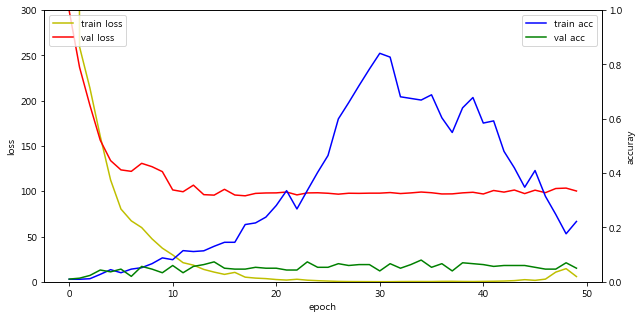

In [11]:
fig, loss_ax = plt.subplots()
fig.set_size_inches(10,5)  # 챠트 크기 설정

acc_ax = loss_ax.twinx()  # x 축을 공유하는 새로운 Axes 객체를 만든다.

loss_ax.set_ylim([0.0, 300.0]) # 손실률 Y 축 범위, 왼쪽
acc_ax.set_ylim([0.0, 1.0]) # 정확도 Y 축 범위, 오른쪽

loss_ax.plot(hist.history['loss'], 'y', label='train loss') # 왼쪽 y 축 기준
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss') # 왼쪽 y 축 기준

acc_ax.plot(hist.history['acc'], 'b', label='train acc')    # 오른쪽 y 축 기준
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')    # 오른쪽 y 축 기준

loss_ax.set_xlabel('epoch')   # x 축 레이블 지정
loss_ax.set_ylabel('loss')    # 왼쪽 y 축 레이블
acc_ax.set_ylabel('accuray')  # 오른쪽 y 축 레이블

loss_ax.legend(loc='upper left') # 좌측 y 기준 범례 위치 
acc_ax.legend(loc='upper right') # 우측 y 기준 범례 위치

plt.show()  # 챠트 출력

In [12]:
# 확인 필요
loss, accuracy = model.evaluate(x_val_1d, y_val, batch_size=32)
print('손실값: ' + str(loss), ' / 정확도: ' + str(accuracy * 100),'%')

300/300 [==============================] - 0s 155us/step
손실값: 100.2114486694336  / 정확도: 5.000000009934107 %


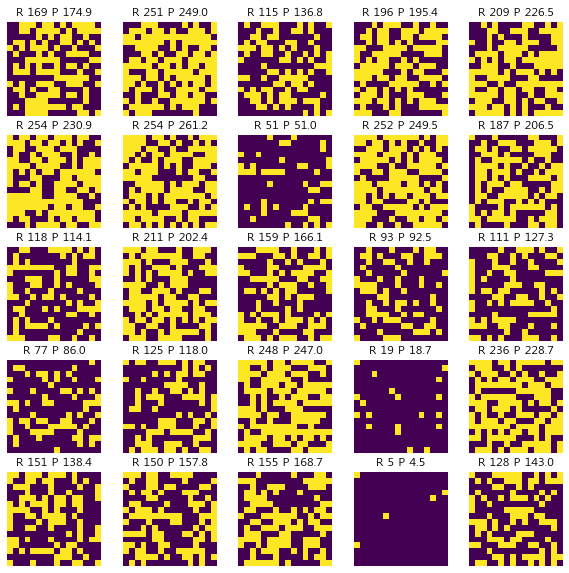

In [13]:
yhat_test = model.predict(x_test_1d, batch_size=32)
plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]  # //: 정수형 나누기
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.set_title('R %d P %.1f' % (y_test[i][0], yhat_test[i][0]))  # R: 실제값, P: 예측한 값

plt.show()



### 컨볼루션 신경망 모델

In [8]:
x_train, y_train = generate_dataset(1500)
print(x_train.shape)
print(y_train.shape)

x_val, y_val = generate_dataset(300)
x_test, y_test = generate_dataset(100)
print(x_train.shape[0], x_val.shape[0],x_test.shape[0])

# 사용안함
# x_train_1d = x_train.reshape(x_train.shape[0], width*height)  # 1500, 256
# x_val_1d = x_val.reshape(x_val.shape[0], width*height)        # 300, 256
# x_test_1d = x_test.reshape(x_test.shape[0], width*height)     # 100, 256 

(1500, 16, 16, 1)
(1500, 1)
1500 300 100


In [9]:
model = Sequential()
# 3행 3열의 32개 커널 사용, 입력 형식 3차원 배열
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1))) 
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # 벡터(변수, 노드) 차원(갯수) 50% 감소
model.add(Flatten()) # 평탄화, 1차원 텐서(1차원 배열)로 변경
model.add(Dense(256, activation='relu'))
model.add(Dense(1))  # 수치예측임으로 계산 결과를 그대로 출력

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# x_train: (1500, 16, 16, 1), y_train: (1500, 1)
start=time.time()
hist = model.fit(x_train, y_train, batch_size=32, epochs=50, 
                 validation_data=(x_val, y_val))
print("training Runtime: %0.2f 초" % ((time.time() - start)))

Train on 1500 samples, validate on 300 samples
Epoch 1/50
1500/1500 [==============================] - 2s 1ms/step - loss: 8045.4591 - acc: 0.0047 - val_loss: 951.2070 - val_acc: 0.0067
Epoch 2/50
1500/1500 [==============================] - 2s 1ms/step - loss: 828.8840 - acc: 0.0073 - val_loss: 468.7191 - val_acc: 0.0067
Epoch 3/50
1500/1500 [==============================] - 2s 1ms/step - loss: 389.0870 - acc: 0.0187 - val_loss: 171.0640 - val_acc: 0.0467
Epoch 4/50
1500/1500 [==============================] - 1s 982us/step - loss: 155.9267 - acc: 0.0380 - val_loss: 137.8287 - val_acc: 0.0333
Epoch 5/50
1500/1500 [==============================] - 1s 962us/step - loss: 139.3875 - acc: 0.0240 - val_loss: 118.5972 - val_acc: 0.0400
Epoch 6/50
1500/1500 [==============================] - 1s 953us/step - loss: 134.2441 - acc: 0.0353 - val_loss: 121.9499 - val_acc: 0.0500
Epoch 7/50
1500/1500 [==============================] - 1s 948us/step - loss: 134.6766 - acc: 0.0247 - val_loss: 107.0

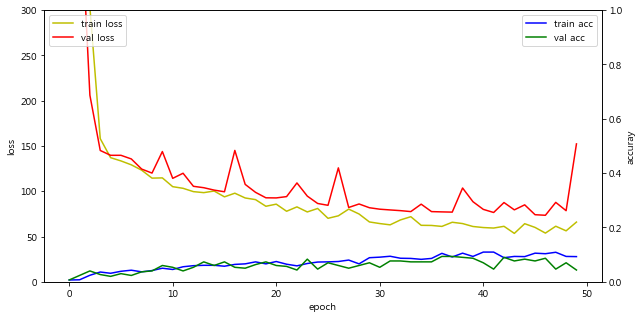

In [18]:
fig, loss_ax = plt.subplots()
fig.set_size_inches(10,5)  # 챠트 크기 설정

acc_ax = loss_ax.twinx()  # x 축을 공유하는 새로운 Axes 객체를 만든다.

loss_ax.set_ylim([0.0, 300.0]) # 손실률 Y 축 범위, 왼쪽
acc_ax.set_ylim([0.0, 1.0]) # 정확도 Y 축 범위, 오른쪽

loss_ax.plot(hist.history['loss'], 'y', label='train loss') # 왼쪽 y 축 기준
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss') # 왼쪽 y 축 기준

acc_ax.plot(hist.history['acc'], 'b', label='train acc')    # 오른쪽 y 축 기준
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')    # 오른쪽 y 축 기준

loss_ax.set_xlabel('epoch')   # x 축 레이블 지정
loss_ax.set_ylabel('loss')    # 왼쪽 y 축 레이블
acc_ax.set_ylabel('accuray')  # 오른쪽 y 축 레이블

loss_ax.legend(loc='upper left') # 좌측 y 기준 범례 위치 
acc_ax.legend(loc='upper right') # 우측 y 기준 범례 위치

plt.show()  # 챠트 출력

In [21]:
# 확인 필요
loss, accuracy = model.evaluate(x_val, y_val, batch_size=32)
print('손실값: ' + str(loss), ' / 정확도: ' + str(accuracy * 100),'%')

300/300 [==============================] - 0s 229us/step
손실값: 152.21942952473958  / 정확도: 4.333333333333334 %


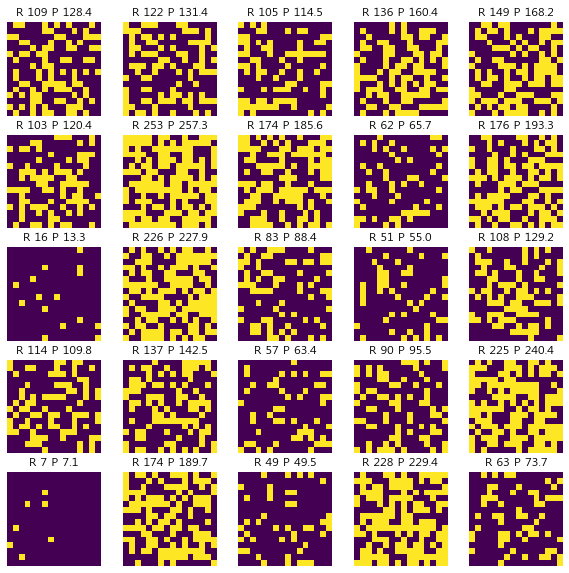

In [22]:
yhat_test = model.predict(x_test, batch_size=32)
plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]  # //: 정수형 나누기
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.set_title('R %d P %.1f' % (y_test[i][0], yhat_test[i][0]))  # R: 실제값, P: 예측한 값

plt.show()